In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp 

# Problem 7.7

In [70]:
ode_kwargs = {
    'method': "Radau",
    'rtol': 1e-8,
    'atol': 1e-8,
}

def ode_linear(t, y):
    f = y*0

    V = 1
    k_1 = 50
    k_2 = 54
    k_3 = 4
    C_Rs = 1.5
    C_Ps = 1
    F_s = 21
    C_Rins = 5.5

    C_Rin = 0
    F = 7

    C_R = y[0] 
    C_P = y[1]

    f[0] = -(F_s/V + k_1 + 2 * k_3 * C_Rs) * C_R + F_s/V * C_Rin + (C_Rins - C_Rs)/V * F
    f[1] = k_1 * C_R - (F_s/V + k_2) * C_P - C_Ps/V * F

    return f

def ode_non_linear(t, y):
    f = y*0

    C_in = 5.5
    F = 28
    V = 1

    C_R = y[0] 
    C_P = y[1]

    f[0] = F/V*C_in - F/V*C_R - 50*C_R - 4*C_R**2
    f[1] = -F/V*C_P + 50*C_R - 54*C_P

    return f

sol_linear = solve_ivp(ode_linear, [0, 0.5], [0, 0], **ode_kwargs)

sol_non_linear = solve_ivp(ode_non_linear, [0, 0.5], [1.5, 1], **ode_kwargs)

$C_R$ plotting

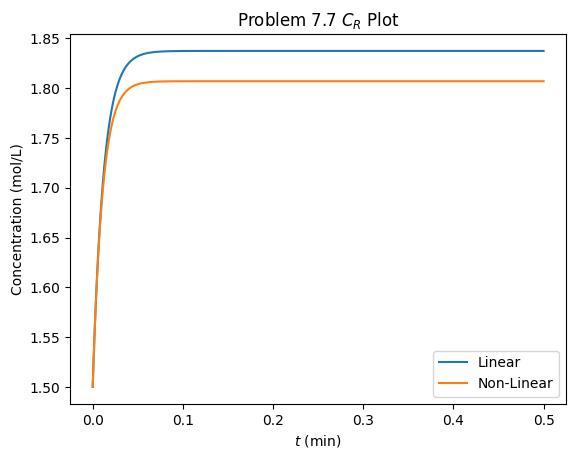

In [74]:
plt.plot(sol_linear.t, sol_linear.y[0] + 1.5, label="Linear")
plt.plot(sol_non_linear.t, sol_non_linear.y[0], label="Non-Linear")
plt.xlabel(r"$t$ (min)")
plt.ylabel("Concentration (mol/L)")
plt.title(r"Problem 7.7 $C_R$ Plot")
plt.legend()

$C_P$ plotting

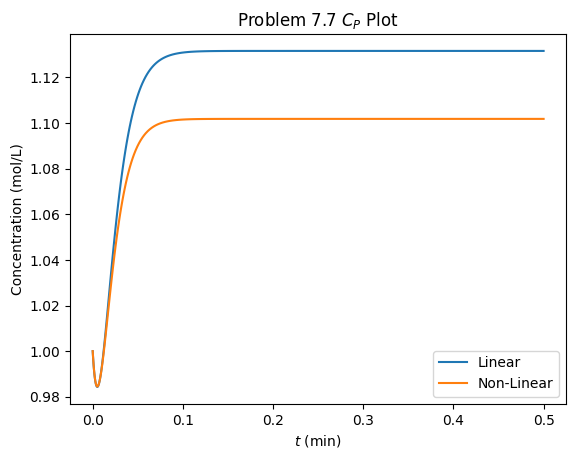

In [76]:
plt.plot(sol_linear.t, sol_linear.y[1] + 1, label="Linear")
plt.plot(sol_non_linear.t, sol_non_linear.y[1], label="Non-Linear")
plt.xlabel(r"$t$ (min)")
plt.ylabel("Concentration (mol/L)")
plt.title(r"Problem 7.7 $C_P$ Plot")
plt.legend()

# Problem 6.9

In [90]:
ode_kwargs = {
    'method': "Radau",
    'rtol': 1e-8,
    'atol': 1e-8,
}

def ode_1(t, y):
    f = y*0

    x_1 = y[0]
    x_2 = y[1]

    u_1 = 1
    u_2 = 0

    f[0] = -83 * x_1 + 21 * u_1 + 4 * u_2
    f[1] = 50 * x_1 - 75 * x_2 - u_2

    return f

def ode_2(t, y):
    f = y*0

    x_1 = y[0]
    x_2 = y[1]

    u_1 = 0
    u_2 = 1

    f[0] = -83 * x_1 + 21 * u_1 + 4 * u_2
    f[1] = 50 * x_1 - 75 * x_2 - u_2

    return f

init = [0, 0]

sol_1 = solve_ivp(ode_1, [0, 0.1], init, **ode_kwargs)
sol_2 = solve_ivp(ode_2, [0, 0.1], init, **ode_kwargs)

$x_1$ plotting

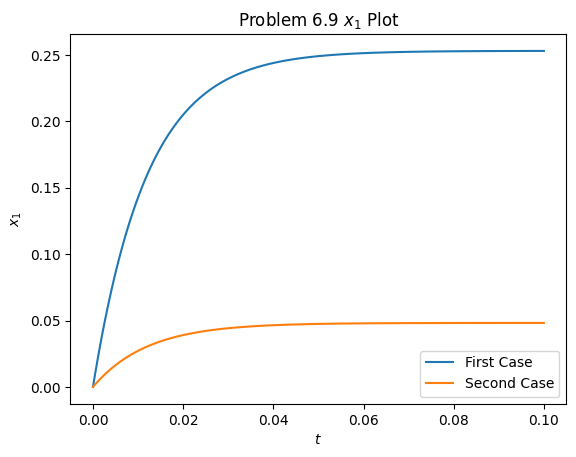

In [92]:
plt.plot(sol_1.t, sol_1.y[0], label="First Case")
plt.plot(sol_2.t, sol_2.y[0], label="Second Case")
plt.xlabel(r"$t$")
plt.ylabel(r"$x_1$")
plt.title(r"Problem 6.9 $x_1$ Plot")
plt.legend()

$x_2$ plotting

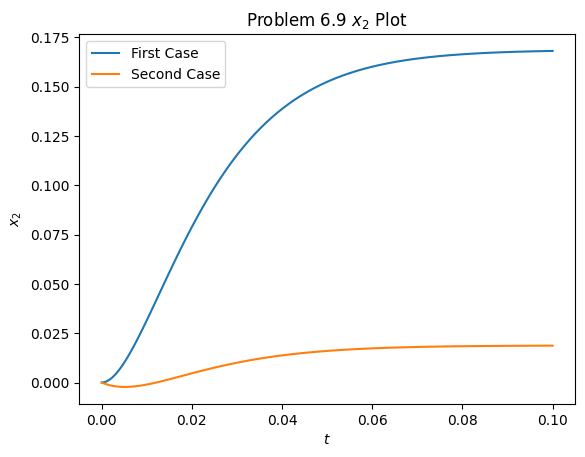

In [91]:
plt.plot(sol_1.t, sol_1.y[1], label="First Case")
plt.plot(sol_2.t, sol_2.y[1], label="Second Case")
plt.xlabel(r"$t$")
plt.ylabel(r"$x_2$")
plt.title(r"Problem 6.9 $x_2$ Plot")
plt.legend()